# Série histórica de suicídios no Brasil entre 2010 e 2019

"Diversos dados sobre suicídios foram reunidos em uma série histórica baseando-se nos dados provenientes do DATASUS. Mais especificamente, a base de dados do Sistema de Informação sobre Mortalidade (SIM) foi utilizada para extração de dados a partir do pacote PySUS.

Para selecionar apenas os casos de suicídio, a variável CAUSABAS ou CAUSABAS_O (ambas retratando causa básica da morte) deveriam possuir valores da Classificação Internacional de Doenças (CID) entre X600 e X850. Essa faixa de casos do CID englobaria lesões autoprovocadas."

FONTE: <a href="https://www.kaggle.com/psicodata/dados-de-suicidios-entre-2010-e-2019">PsicoData</a>


### Variáveis
* <b>DTOBITO:</b> data do óbito.
* <b>DTNASC:</b> data de nascimento.
* <b>SEXO:</b> sexo. 1 : Masculino, 2 : Feminino.
* <b>RACACOR:</b> raça. 1 : Branca, 2 : Preta, 3 : Amarela, 4 : Parda, 5 : Indígena.
* <b>ESTCIV:</b> estado civil. 1 : Solteiro, 2 : Casado, 3 : Viúvo, 4 : Separado judicialmente, 5 : União consensual.
* <b>ESC:</b> escolaridade. 1 : Nenhuma, 2: 1 a 3 anos, 3 : 4 a 7 anos, 4 : 8 a 11 anos, 5 : 12 e mais, 8 : De 9 a 11 anos.
* <b>OCUP:</b> ocupação. Para óbitos a partir de 2006, segue-se a tabela CBO2002.
* <b>CODMUNRES:</b> município de residência do falecido (codificado).
* <b>LOCOCOR:</b> Local de ocorrência do óbito. 1 : Hospital, 2 : Outro estabelecimento de saúde, 3 : Domicílio, 4 : Via pública, 5 :</b> Outros, 9 : NA.
* <b>ASSISTMED:</b> Assistência médica. 1 : Sim, 2 : Não, 9 : NA.
* <b>CAUSABAS:</b> Causa básica do óbito. Código CID-10.
* <b>CAUSABAS_O:</b> Causa básica do óbito. Código CID-10.

<div align='center'>
<img src="imagens/cabeçalho.png">
</div>

In [1]:
import pandas as pd


import plotly.express as px

import matplotlib.pyplot as plt
import matplotlib.dates

import json

from wordcloud import WordCloud, STOPWORDS
from PIL import Image

import numpy as np

In [2]:
df = pd.read_csv("suicidios_2010_a_2019.csv")

/home/felipe/miniconda3/envs/estudos/lib/python3.9/site-packages/IPython/core/interactiveshell.py:3441: DtypeWarning: Columns (9) have mixed types.Specify dtype option on import or set low_memory=False.
  exec(code_obj, self.user_global_ns, self.user_ns)


In [3]:
df.drop('Unnamed: 0', axis=1, inplace=True) #retirando coluna unnmamed

In [4]:
df.head()

,estado,ano,mes,DTOBITO,DTNASC,SEXO,RACACOR,ASSISTMED,ESCMAE,ESTCIV,ESC,OCUP,CODMUNRES,CAUSABAS,CAUSABAS_O,LOCOCOR,CIRURGIA
0,AC,2010,1,2010-01-31,1999-11-09,Masculino,Parda,NaN,NaN,Solteiro/a,1 a 3 anos,ESTUDANTE,Tarauacá,X780,X780,Via pública,Não
1,AC,2010,2,2010-02-07,1985-09-23,Masculino,Parda,NaN,NaN,Solteiro/a,1 a 3 anos,ESTUDANTE,Tarauacá,X780,X780,Hospital,Não
2,AC,2010,2,2010-02-19,1995-08-06,Masculino,Parda,NaN,NaN,Solteiro/a,1 a 3 anos,ESTUDANTE,Tarauacá,X780,X780,Hospital,Não
3,AC,2010,4,2010-04-20,1983-12-25,Feminino,Parda,NaN,NaN,Casado/a,1 a 3 anos,DONA DE CASA,Tarauacá,X780,X780,Domicílio,Não
4,AC,2010,7,2010-07-24,1982-05-13,Masculino,Parda,NaN,NaN,Casado/a,NaN,DONA DE CASA,Tarauacá,X720,X720,Domicílio,Não


In [5]:
df.shape

(112491, 17)

In [6]:
df.columns

Index(['estado', 'ano', 'mes', 'DTOBITO', 'DTNASC', 'SEXO', 'RACACOR',
       'ASSISTMED', 'ESCMAE', 'ESTCIV', 'ESC', 'OCUP', 'CODMUNRES', 'CAUSABAS',
       'CAUSABAS_O', 'LOCOCOR', 'CIRURGIA'],
      dtype='object')

In [7]:
df.dtypes

estado        object
ano            int64
mes            int64
DTOBITO       object
DTNASC        object
SEXO          object
RACACOR       object
ASSISTMED     object
ESCMAE        object
ESTCIV        object
ESC           object
OCUP          object
CODMUNRES     object
CAUSABAS      object
CAUSABAS_O    object
LOCOCOR       object
CIRURGIA      object
dtype: object

In [8]:
df.isnull().sum()

estado             0
ano                0
mes                0
DTOBITO            0
DTNASC         10858
SEXO              22
RACACOR         3171
ASSISTMED      41804
ESCMAE        112476
ESTCIV          8700
ESC            28164
OCUP           52217
CODMUNRES          0
CAUSABAS           0
CAUSABAS_O       287
LOCOCOR          460
CIRURGIA      103942
dtype: int64

In [9]:
df.drop(["CIRURGIA",'ESCMAE' ], axis=1, inplace=True)

In [10]:
df.head()

,estado,ano,mes,DTOBITO,DTNASC,SEXO,RACACOR,ASSISTMED,ESTCIV,ESC,OCUP,CODMUNRES,CAUSABAS,CAUSABAS_O,LOCOCOR
0,AC,2010,1,2010-01-31,1999-11-09,Masculino,Parda,NaN,Solteiro/a,1 a 3 anos,ESTUDANTE,Tarauacá,X780,X780,Via pública
1,AC,2010,2,2010-02-07,1985-09-23,Masculino,Parda,NaN,Solteiro/a,1 a 3 anos,ESTUDANTE,Tarauacá,X780,X780,Hospital
2,AC,2010,2,2010-02-19,1995-08-06,Masculino,Parda,NaN,Solteiro/a,1 a 3 anos,ESTUDANTE,Tarauacá,X780,X780,Hospital
3,AC,2010,4,2010-04-20,1983-12-25,Feminino,Parda,NaN,Casado/a,1 a 3 anos,DONA DE CASA,Tarauacá,X780,X780,Domicílio
4,AC,2010,7,2010-07-24,1982-05-13,Masculino,Parda,NaN,Casado/a,NaN,DONA DE CASA,Tarauacá,X720,X720,Domicílio


# Transformando datas

In [11]:
df['DTOBITO'] = pd.to_datetime( df['DTOBITO'] ,format="%Y/%m/%d")
df['DTNASC']=  pd.to_datetime( df['DTNASC'] ,format="%Y/%m/%d",errors = 'coerce')
df['ano_mes'] =df['DTOBITO'].dt.strftime('%Y-%m')
df['ano_nasc'] =df['DTNASC'].dt.strftime('%Y')

In [12]:
df.head()

,estado,ano,mes,DTOBITO,DTNASC,SEXO,RACACOR,ASSISTMED,ESTCIV,ESC,OCUP,CODMUNRES,CAUSABAS,CAUSABAS_O,LOCOCOR,ano_mes,ano_nasc
0,AC,2010,1,2010-01-31,1999-11-09,Masculino,Parda,NaN,Solteiro/a,1 a 3 anos,ESTUDANTE,Tarauacá,X780,X780,Via pública,2010-01,1999
1,AC,2010,2,2010-02-07,1985-09-23,Masculino,Parda,NaN,Solteiro/a,1 a 3 anos,ESTUDANTE,Tarauacá,X780,X780,Hospital,2010-02,1985
2,AC,2010,2,2010-02-19,1995-08-06,Masculino,Parda,NaN,Solteiro/a,1 a 3 anos,ESTUDANTE,Tarauacá,X780,X780,Hospital,2010-02,1995
3,AC,2010,4,2010-04-20,1983-12-25,Feminino,Parda,NaN,Casado/a,1 a 3 anos,DONA DE CASA,Tarauacá,X780,X780,Domicílio,2010-04,1983
4,AC,2010,7,2010-07-24,1982-05-13,Masculino,Parda,NaN,Casado/a,NaN,DONA DE CASA,Tarauacá,X720,X720,Domicílio,2010-07,1982


In [13]:
df.isnull().sum()

estado            0
ano               0
mes               0
DTOBITO           0
DTNASC        11742
SEXO             22
RACACOR        3171
ASSISTMED     41804
ESTCIV         8700
ESC           28164
OCUP          52217
CODMUNRES         0
CAUSABAS          0
CAUSABAS_O      287
LOCOCOR         460
ano_mes           0
ano_nasc      11742
dtype: int64

In [14]:
df.dtypes

estado                object
ano                    int64
mes                    int64
DTOBITO       datetime64[ns]
DTNASC        datetime64[ns]
SEXO                  object
RACACOR               object
ASSISTMED             object
ESTCIV                object
ESC                   object
OCUP                  object
CODMUNRES             object
CAUSABAS              object
CAUSABAS_O            object
LOCOCOR               object
ano_mes               object
ano_nasc              object
dtype: object

# Analisando os dados 

## Número suicídios no Brasil durante o período de 2010 a 2019

In [15]:
df_data = df.groupby('ano_mes').agg('size').reset_index()

In [16]:
df_data.columns = ['ano_mes', 'size']

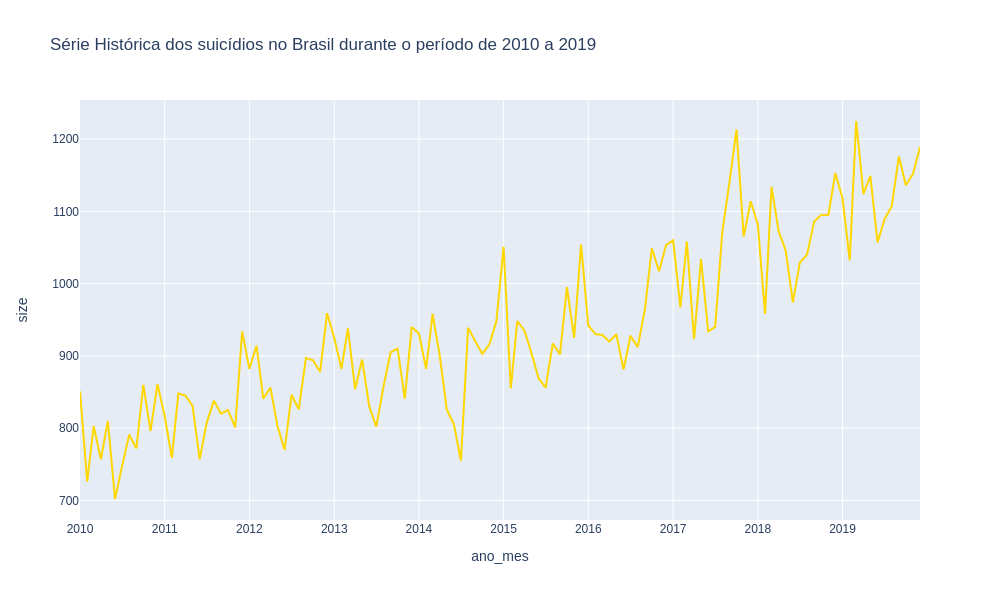

In [107]:
fig = px.line(df_data, 
              x=df_data['ano_mes'], 
              y=df_data['size'], 
              title='Série Histórica dos suicídios no Brasil durante o período de 2010 a 2019',
              labels=dict(y="Número de casos"),
              color_discrete_sequence=['#ffd700'],
              height=600,
             width=1000)
fig.show("png")

# Número de suicídio por Estado durante o período de 2010 a 2019

In [18]:
df_estado = df.groupby('estado').agg('size').reset_index()

In [19]:
df_estado.columns = ['estado', 'size']

In [20]:
geojson = json.load(open('brasil_estados.json'))

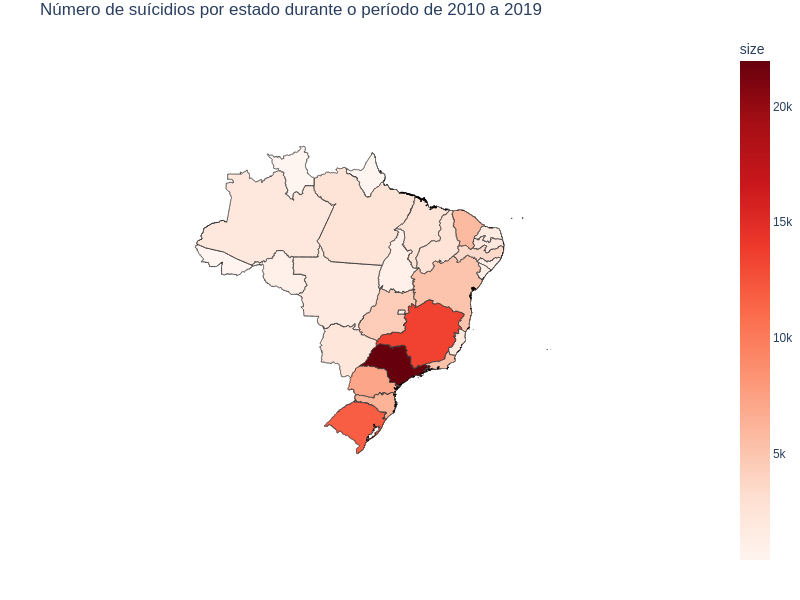

In [99]:
fig = px.choropleth(
     df_estado,
     locations = 'estado', 
     geojson = geojson, 
     color = 'size',
     title = "Número de suícidios por estado durante o período de 2010 a 2019",
     color_continuous_scale="reds",
     center =  {"lat":-22.9034 ,"lon":   -43.1917},
)
fig.update_geos(fitbounds="locations", visible=False)

fig.update_layout(margin={"r":0,"t":30,"l":30,"b":30},
                 height=600,
             width=800)
fig.show("png")

# Cidades com maior número de suicídio por estado no período de 2010 a 2019

In [22]:
df_cit = df.groupby(['estado','CODMUNRES']).agg(['size'])

In [23]:
df_cit = df_cit['DTOBITO'].sort_values('size', ascending=False).sort_index(level=[0], sort_remaining=False)

In [24]:
cit_aux=[]
val_aux=[]
for i in df_cit.index.get_level_values('estado').unique():
    cit_aux.append(df_cit.loc[i].index[0]+','+i)
    val_aux.append(df_cit.loc[i]['size'].max())
data = {'cidade/estado': cit_aux , 'quantidade':val_aux}
df_cit = pd.DataFrame(data=data)

In [25]:
df_cit

,cidade/estado,quantidade
0,"Rio Branco,AC",231
1,"Maceió,AL",317
2,"Manaus,AM",1005
3,"Macapá,AP",279
4,"Salvador,BA",683
5,"Fortaleza,CE",1374
6,"Brasília,DF",1490
7,"Serra,ES",198
8,"Goiânia,GO",886
9,"São Luís,MA",374


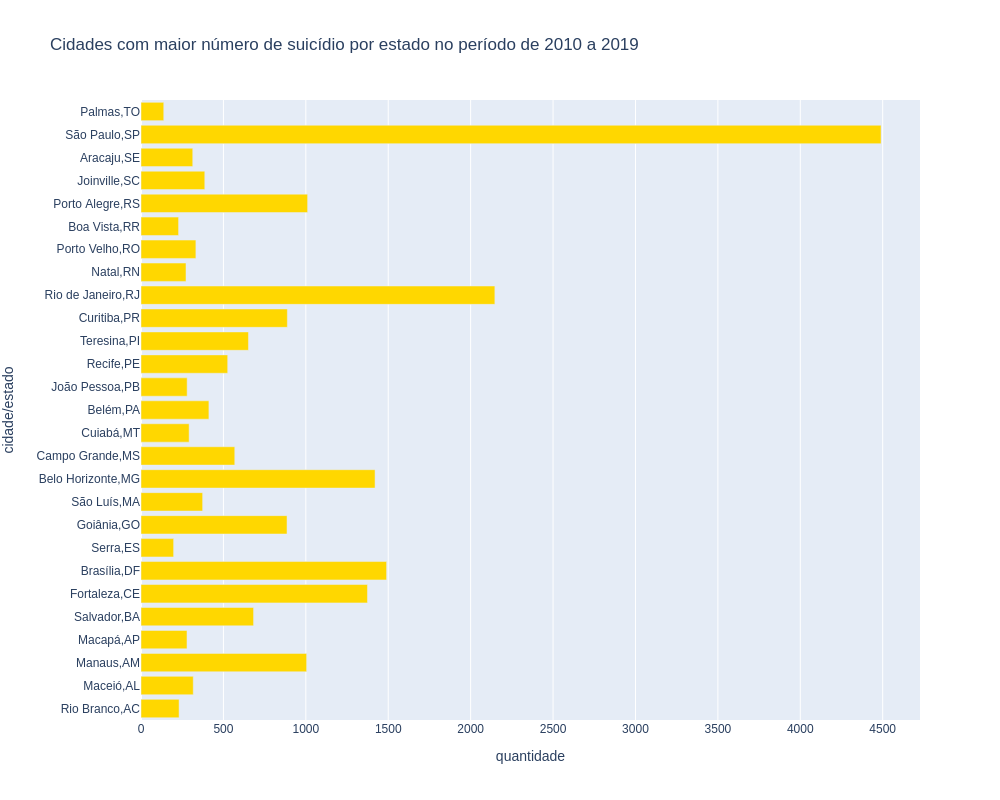

In [85]:
fig = px.bar(df_cit, y="cidade/estado", x="quantidade",
             title='Cidades com maior número de suicídio por estado no período de 2010 a 2019',
             height=800,
             width=1000,
            color_discrete_sequence=['#ffd700'])
fig.show("png")

## Número de suicídio por sexo

In [26]:
df_sex = df.groupby(['ano','SEXO']).agg('size').reset_index()

In [27]:
df_sex.columns = ['ano','SEXO', 'size']

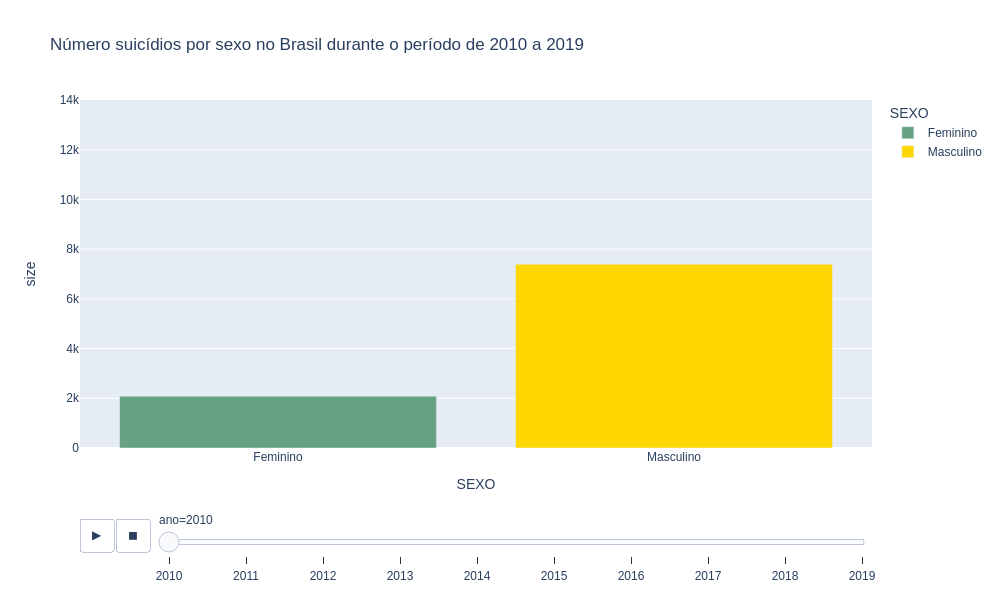

In [105]:
fig = px.bar(df_sex, x="SEXO", y="size", 
             color="SEXO",
             animation_frame="ano", 
             animation_group="SEXO", 
             title='Número suicídios por sexo no Brasil durante o período de 2010 a 2019',
             range_y=[0,14000],
            color_discrete_map={'Feminino': '#66a182','Masculino': '#ffd700'},
            height=600,
             width=1000)
fig.show("png")

# Número de suícidio por RAÇA / COR no período de 2010 a 2019

In [29]:
df['RACACOR'].unique()

array(['Parda', 'Preta', nan, 'Branca', 'Amarela', 'Indígena'],
      dtype=object)

In [30]:
df['RACACOR'].fillna('Não Informado', inplace=True)
df['RACACOR'].replace('Amarela','Parda', inplace=True)

In [31]:
df_raca = df.groupby(['ano','RACACOR']).agg('size').reset_index()

In [32]:
df_raca.columns = ['ano','RACACOR', 'size']

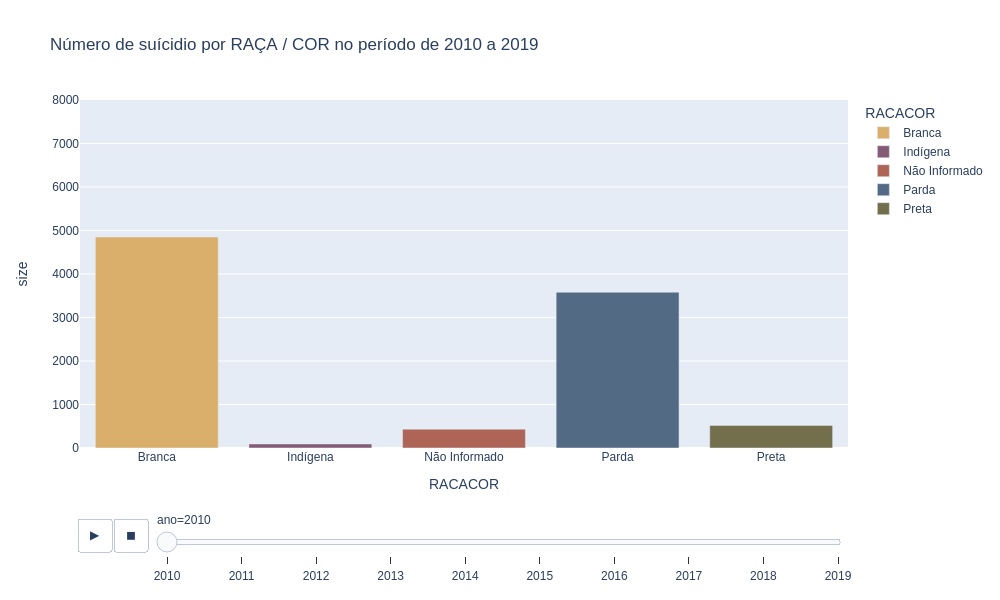

In [104]:
fig = px.bar(df_raca, x="RACACOR", y="size", 
             color="RACACOR",
             animation_frame="ano", 
             animation_group="RACACOR", 
             title='Número de suícidio por RAÇA / COR no período de 2010 a 2019',
             range_y=[0,8000],
            color_discrete_map={'Parda':'rgb(82, 106, 131)' ,'Preta':'rgb(115, 111, 76)' ,'Não Informado':'rgb(175, 100, 88)', 'Branca':'rgb(217, 175, 107)','Indígena':'rgb(133, 92, 117)'},
            height=600,
             width=1000,)
fig.show("png")

# Número de suícidio por estado civil no período de 2010 a 2019

In [34]:
df['ESTCIV'].unique()

array(['Solteiro/a', 'Casado/a', nan, 'Viúvo/a',
       'Separado/a judicialmente', 'União consensual'], dtype=object)

In [35]:
df['ESTCIV'].isnull().sum()

8700

In [36]:
df['ESTCIV'].fillna('Não Informado', inplace=True)

In [37]:
df_estciv = df.groupby('ESTCIV').agg('size').reset_index()

In [38]:
df_estciv.columns = ['estciv', 'size']

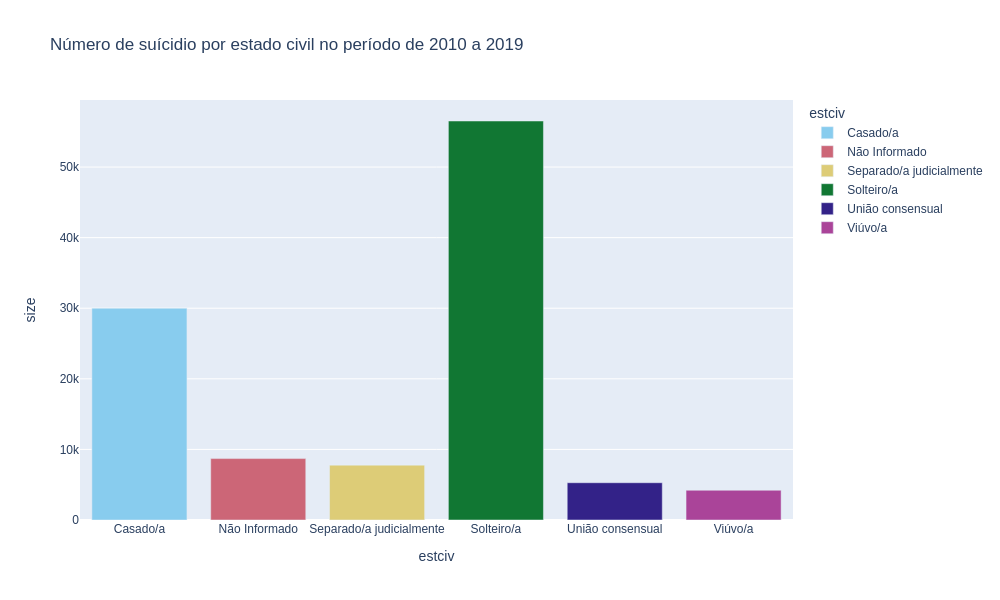

In [103]:
fig = px.bar(df_estciv, y="size", x="estciv",
             color='estciv',
             title='Número de suícidio por estado civil no período de 2010 a 2019',
             color_discrete_sequence=px.colors.qualitative.Safe,
            height=600,
             width=1000)
fig.show("png")

# Idade

In [40]:
df_idade = df.dropna(subset = ['DTNASC'])

In [41]:
df_idade.dtypes

estado                object
ano                    int64
mes                    int64
DTOBITO       datetime64[ns]
DTNASC        datetime64[ns]
SEXO                  object
RACACOR               object
ASSISTMED             object
ESTCIV                object
ESC                   object
OCUP                  object
CODMUNRES             object
CAUSABAS              object
CAUSABAS_O            object
LOCOCOR               object
ano_mes               object
ano_nasc              object
dtype: object

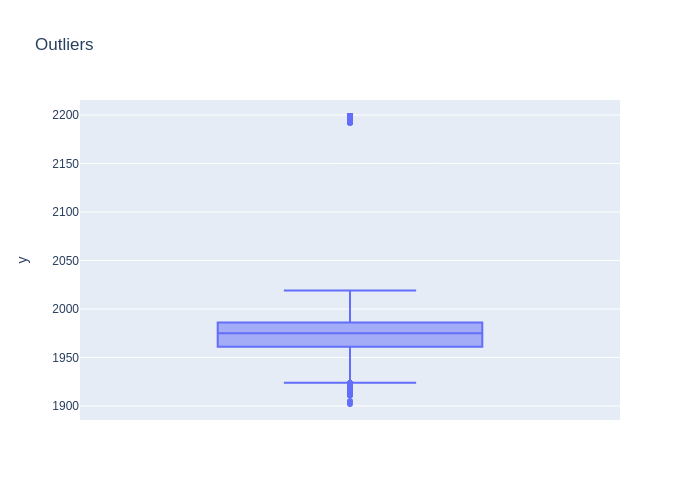

In [72]:
fig = px.box(df, y=df['ano_nasc'].astype(float),title='Outliers')
fig.show("png")

In [43]:
df_idade = df[df['ano_nasc'].astype(float).between(1925, 2019)]

In [44]:
df_idade['idade'] = ((df_idade.DTOBITO - df_idade.DTNASC)/np.timedelta64(1, 'Y')).astype('int')

/tmp/ipykernel_19586/3954291129.py:1: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



In [45]:
bins= [0,10,20,30,40,50,60,70,80,90,110]
labels = ['0-10','10-20','20-30','30-40','40-50','50-60','60-70','70-80','80-90','90-110']

In [46]:
df_idade['grupos'] = pd.cut(df_idade['idade'], bins=bins, labels=labels, right=False)

/tmp/ipykernel_19586/3472360782.py:1: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



In [47]:
df_idade = df_idade.groupby('grupos').agg('size').reset_index()

In [48]:
df_idade.columns = ['grupos','size']

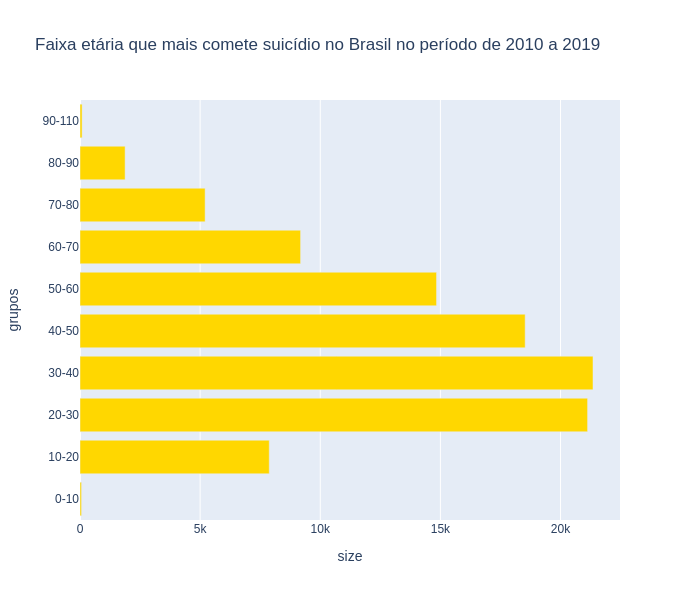

In [97]:
fig = px.bar(df_idade, y="grupos", x="size",
             title='Faixa etária que mais comete suicídio no Brasil no período de 2010 a 2019',
             height=600,
             color_discrete_sequence=['#ffd700'])
fig.show("png")

# Local da Ocorrência

In [50]:
df['LOCOCOR'].fillna('Não Informado', inplace=True)

In [51]:
df['LOCOCOR'].unique()

array(['Via pública', 'Hospital', 'Domicílio', 'Outros',
       'Outro estabelecimento de saúde', 'Não Informado'], dtype=object)

In [52]:
df['LOCOCOR'].replace('Outro estabelecimento de saúde','Departamentos de Saúde', inplace=True)
df['LOCOCOR'].replace('Hospital','Departamentos de Saúde', inplace=True)

In [53]:
df['LOCOCOR'].unique()

array(['Via pública', 'Departamentos de Saúde', 'Domicílio', 'Outros',
       'Não Informado'], dtype=object)

In [54]:
df_lococor = df.groupby('LOCOCOR').agg('size').reset_index()

In [55]:
df_lococor.columns = ['lococor','size']

In [56]:
df_lococor

,lococor,size
0,Departamentos de Saúde,19312
1,Domicílio,68221
2,Não Informado,460
3,Outros,17502
4,Via pública,6996


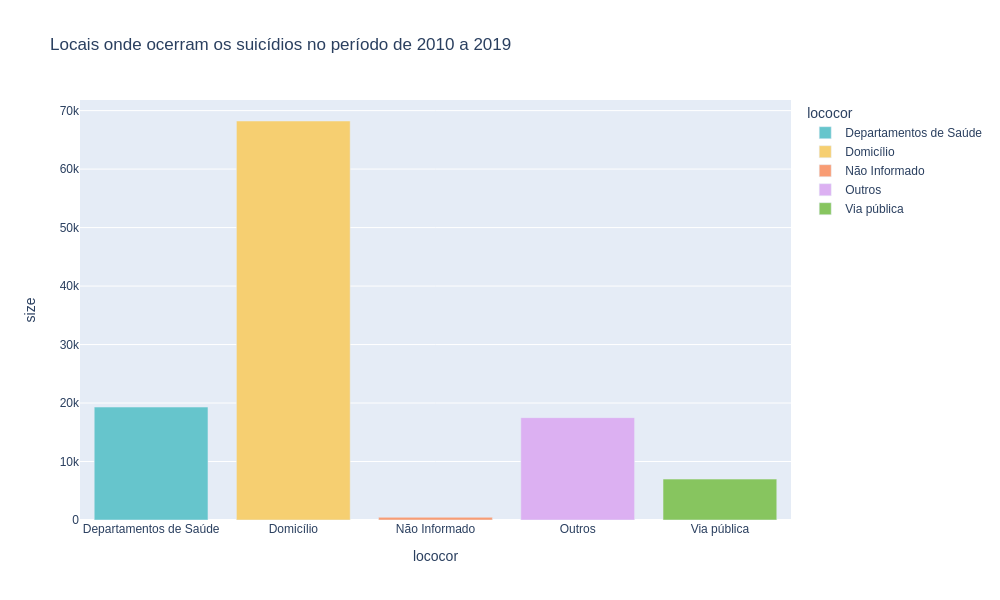

In [102]:
fig = px.bar(df_lococor, y="size", x="lococor",
             color='lococor',
             title='Locais onde ocerram os suicídios no período de 2010 a 2019',
             color_discrete_sequence=px.colors.qualitative.Pastel,
             height=600,
             width=1000)
fig.show("png")

# Ocupação / Profissão 

In [58]:
df_ocup = df.groupby('OCUP').agg('size').reset_index()

In [59]:
df_ocup.columns = ['ocupacao', 'size']

In [60]:
df_ocup.sort_values(by='size',ascending= False)[:10]

,ocupacao,size
50,APOSENTADO/PENSIONISTA,7836
303,ESTUDANTE,7756
244,DONA DE CASA,6149
780,TRABALHADOR AGROPECUARIO EM GERAL,5924
262,EMPREGADO DOMESTICO NOS SERVICOS GERAIS,2520
208,DESEMPREGADO CRONICO,2374
362,IGNORADA,2215
618,PRODUTOR AGRICOLA POLIVALENTE,2085
681,REPRESENTANTE COMERCIAL AUTONOMO,2073
133,CASEIRO (AGRICULTURA),1462


In [61]:
df_ocup = df[df['OCUP'].isin(['ESTUDANTE','DONA DE CASA','APOSENTADO/PENSIONISTA'])]

# Setembro Amarelo

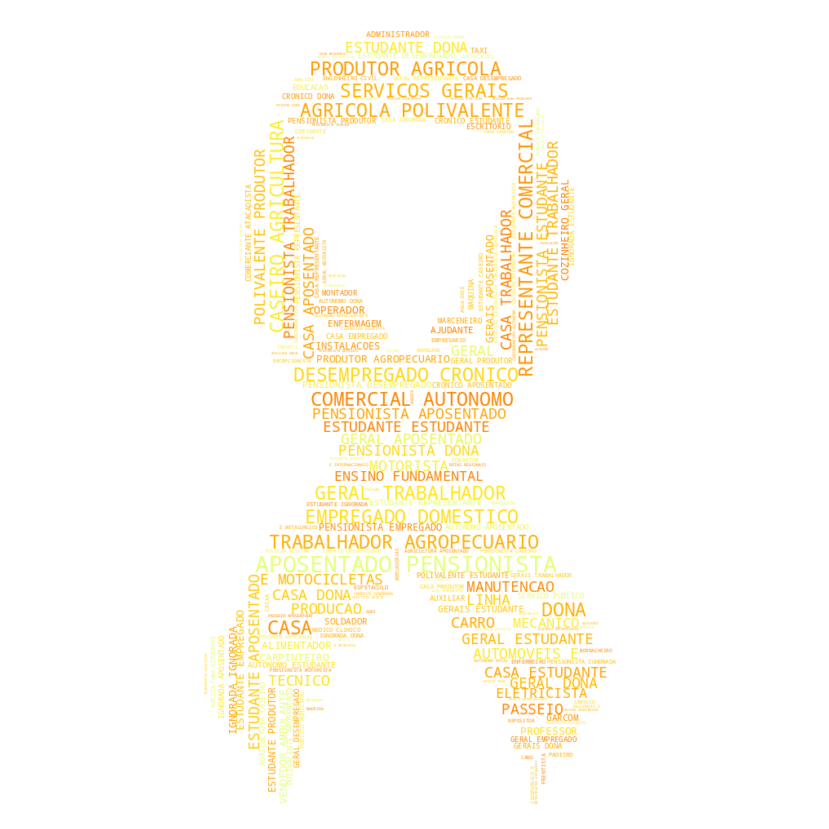

In [62]:
setembro_mask = np.array(Image.open("mask.png")) # máscara

stopwords = set(STOPWORDS) # stop words
stopwords.update(["DA", "DE", "EM", "DE", "NO", "AO", "NOS"])

ocup = df.dropna(subset=['OCUP'], axis=0)['OCUP'] #retirar Nan values
all_ocup = " ".join(s for s in ocup) # juntar palavras
wordcloud = WordCloud(stopwords=stopwords,
                      background_color="white",
                      width=1000, height=1000, max_words=200,
                      mask=setembro_mask, max_font_size=200,
                      relative_scaling =0,
                      colormap="Wistia"
                     ).generate(all_ocup)


fig, ax = plt.subplots(figsize=(20,15))
ax.imshow(wordcloud, interpolation='bilinear')
ax.set_axis_off()